In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-5, 5, 5)
x, y = np.meshgrid(x, x)
u, v = 12 * x, 12 * y

In [3]:
data = [
    (-1.5, .5, -6, -6),
    (1, -1, -46, 46),
    (-3, -1, 11, -11),
    (1, 1.5, 80, 80),
    (0.5, 0.25, 25, 15),
    (-1.5, -0.5, -5, 40),
]

dtypes = [
    ("x", np.float32), ("y", np.float32),
    ("u", np.float32), ("v", np.float32),
]

data = np.array(data, dtype=dtypes)

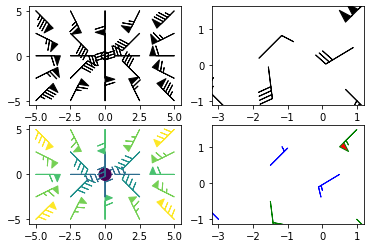

In [4]:
fig1, axs1 = plt.subplots(nrows=2, ncols=2)
# default parameters, uniform grid
axs1[0, 0].barbs(x, y, u, v)

# arbitrary set of vectors, make them longer and change the pivot point
# (point around which they're rotated) to be the middle
axs1[0, 1].barbs(data["x"], data["y"], data["u"], data["v"], length=8, pivot="middle")

# showing colormapping with uniform grid. Fill the circle for an empty barb,
# don't round the values, and change some of the size parameters
axs1[1, 0].barbs(
    x, y, u, v, np.sqrt(u ** 2 + v ** 2), fill_empty=True, rounding=False,
    sizes=dict(emptybarb=0.25, spacing=0.2, height=0.3),
)

# change colors as well as the increments for parts of the barbs
axs1[1, 1].barbs(
    data["x"], data["y"], data["u"], data["v"], flagcolor="r",
    barbcolor=["b", "g"], flip_barb=True,
    barb_increments=dict(half=10, full=20, flag=100),
)

plt.show()

In [5]:
# masked arrays are also supported
masked_u = np.ma.masked_array(data["u"])
masked_u[4] = 1000 # bad value that should not be plotted when masked
masked_u[4] = np.ma.masked

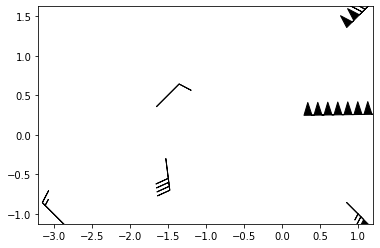

In [6]:
# identical plot to panel 2 in the first figure,
# but with the point at (0.5, 0.25) missing (masked)
fig2, axs2 = plt.subplots()
axs2.barbs(data["x"], data["y"], data["u"], data["v"], length=8, pivot="middle")
plt.show()